In [1]:
import multiprocessing
import threading
import numpy as np
import tensorflow as tf
from env.env import Account
from Access import Access
from ConvACNet import ConvACNet
from Framework import ExplorerFramework

In [2]:
NUMS_CPU = multiprocessing.cpu_count()
state_size = [50, 58, 5]
action_size = 3
max_episodes = 100
GD = {}

In [3]:
class Worker(ExplorerFramework):
    def __init__(self, access, name, observation, action_size):
        super().__init__(access, name, observation, action_size)

    def run(self, sess, max_episodes, t_max=32):
        episode_score_list = []
        episode = 0
        while episode < max_episodes:
            episode += 1
            episode_socre = self.run_episode(sess, t_max)
            episode_score_list.append(episode_socre)
            GD[str(self.name)] = episode_score_list
            if self.name == 'W0':
                print('Episode: %f, score: %f' % (episode, episode_socre))
                print('\n')

In [4]:
with tf.Session() as sess:
    with tf.device("/cpu:0"):
        A = Access(state_size, action_size)
        F_list = []
        for i in range(NUMS_CPU):
            F_list.append(Worker(A, 'W%i' % i, state_size, action_size))
        COORD = tf.train.Coordinator()
        sess.run(tf.global_variables_initializer())
        sess.graph.finalize()

        threads_list = []
        for ac in F_list:
            job = lambda: ac.run(sess, max_episodes)
            t = threading.Thread(target=job)
            t.start()
            threads_list.append(t)
        COORD.join(threads_list)
        A.save(sess, 'model/saver_1.ckpt')

graph W0
graph W1
graph W2
graph W3
graph W4
graph W5
graph W6
graph W7
graph W8
graph W9
graph W10
graph W11
graph W12
graph W13
graph W14
graph W15
graph W16
graph W17
graph W18
graph W19
graph W20
graph W21
graph W22
graph W23
graph W24
graph W25
graph W26
graph W27
graph W28
graph W29
graph W30
graph W31
graph W32
graph W33
graph W34
graph W35
graph W36
graph W37
graph W38
graph W39
actor: 2105.500244, actor_grad: 9575.019531, policy mean: 3.848087, policy: 2105.452148, entropy: -0.001763, actor_norm: 0.049857, critic: 566520.625000, critic_grad: 325066.437500, value: 566515.562500, critic_norm: 5.037037, value_mean: 72.930298, advantage: 630.242188
Episode: 1.000000, score: 7030.850154


actor: -11.286408, actor_grad: 343.709839, policy mean: 0.362182, policy: -11.334450, entropy: -0.002054, actor_norm: 0.050095, critic: 343798.625000, critic_grad: 389281.281250, value: 343793.593750, critic_norm: 5.035612, value_mean: 122.683281, advantage: 495.603943
Episode: 2.000000, score: 13

actor: -343.918579, actor_grad: 21365.255859, policy mean: 0.376132, policy: -343.971649, entropy: -0.002130, actor_norm: 0.055201, critic: 605537.062500, critic_grad: 3884144.750000, value: 605530.062500, critic_norm: 6.999744, value_mean: 2089.939697, advantage: -681.547302
Episode: 26.000000, score: 222177.727008


actor: -246.127655, actor_grad: 12371.124023, policy mean: 0.284592, policy: -246.176346, entropy: -0.006589, actor_norm: 0.055280, critic: 195394.515625, critic_grad: 1460996.000000, value: 195387.437500, critic_norm: 7.080634, value_mean: 1694.908447, advantage: -286.515991
Episode: 27.000000, score: 219842.441721


actor: -879.769165, actor_grad: 19981.556641, policy mean: 1.099162, policy: -879.824341, entropy: -0.000174, actor_norm: 0.055385, critic: 972850.875000, critic_grad: 5495742.500000, value: 972843.687500, critic_norm: 7.210561, value_mean: 2090.499023, advantage: -940.727234
Episode: 28.000000, score: 219311.448246


actor: -1155.824829, actor_grad: 45678.1

actor: -29.657850, actor_grad: 3157.047607, policy mean: 0.046515, policy: -29.705902, entropy: -0.007204, actor_norm: 0.055256, critic: 251843.437500, critic_grad: 2631086.750000, value: 251833.671875, critic_norm: 9.772574, value_mean: 1891.369995, advantage: -493.352325
Episode: 53.000000, score: 229119.481064


actor: -0.207468, actor_grad: 34.493965, policy mean: 0.000287, policy: -0.262229, entropy: -0.000200, actor_norm: 0.054961, critic: 601452.875000, critic_grad: 4314202.000000, value: 601443.000000, critic_norm: 9.897326, value_mean: 2143.291992, advantage: -771.336365
Episode: 54.000000, score: 233029.478414


actor: 0.054254, actor_grad: 0.003367, policy mean: -0.000001, policy: -0.000479, entropy: 0.000000, actor_norm: 0.054733, critic: 266709.312500, critic_grad: 2399945.250000, value: 266699.312500, critic_norm: 9.992886, value_mean: 902.406433, advantage: 505.986115
Episode: 55.000000, score: 226630.156211


actor: 0.054812, actor_grad: 0.005317, policy mean: -0.000001

actor: 83.960480, actor_grad: 0.002811, policy mean: 1.535056, policy: 83.924210, entropy: 0.000000, actor_norm: 0.036274, critic: 60302.625000, critic_grad: 1262252.000000, value: 60289.007812, critic_norm: 13.615252, value_mean: 1472.780396, advantage: -210.233414
Episode: 80.000000, score: 239696.873126


actor: 642.787903, actor_grad: 0.006557, policy mean: 1.535056, policy: 642.752014, entropy: -0.000016, actor_norm: 0.035910, critic: 129122.921875, critic_grad: 1682529.250000, value: 129109.164062, critic_norm: 13.755315, value_mean: 1000.580383, advantage: 343.998413
Episode: 81.000000, score: 230696.083207


actor: -5741.723633, actor_grad: 0.002673, policy mean: 3.070113, policy: -5741.759277, entropy: 0.000000, actor_norm: 0.035740, critic: 2753293.750000, critic_grad: 8176547.500000, value: 2753279.750000, critic_norm: 13.924825, value_mean: 1351.421997, advantage: -1473.974731
Episode: 82.000000, score: 230690.494292


actor: 0.035551, actor_grad: 0.003424, policy mean: -0.

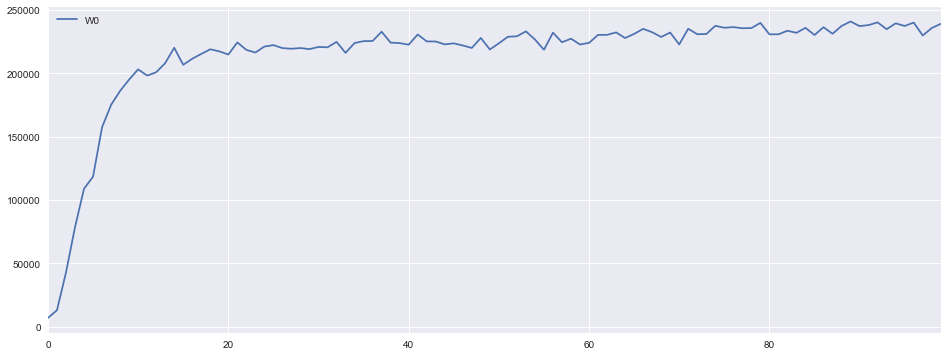

In [5]:
import pandas as pd
import seaborn as sns
%matplotlib inline

tmp = pd.DataFrame(GD)
tmp.iloc[:500,:1].plot(figsize=(16,6))

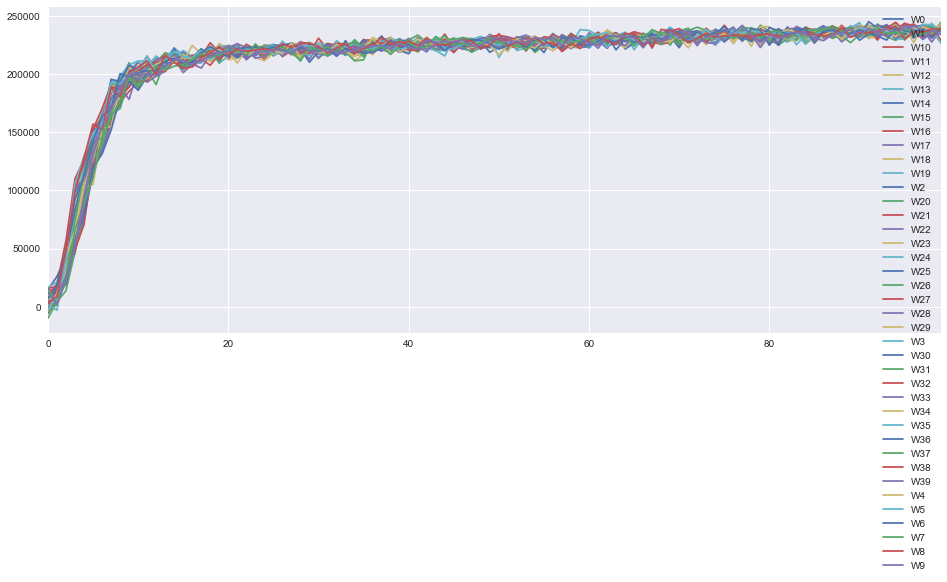

In [6]:
tmp.plot(figsize=(16,6))